### Задание "Оценка точности модели"
* Посчитать tpr и fpr. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.
* Построить график Precision - Recall на этих же данных.

In [1]:
# загрузим основные библиотеки для работы
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# загрузим датасет по класификации атлетов
data = pd.read_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Feature Engineering\\Practice\\ноутбук_и_дополнительнае_материалы-_Оценка_точности_модели__переобучение__регуляризация\\athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [4]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

#### Строим модель логистической регрессии

In [5]:
# Формируем набор признаков и целевую переменную 
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head()

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
# Будем предсказывать пол атлета
y = data['sex']

In [7]:
# Преобразуем категориальные данные в числа
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [8]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [9]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head()

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0
4,1.81,71.0,0,0,0


In [10]:
le.fit(data['sex'])

LabelEncoder()

In [11]:
# Закодировала категории male и female в числа 1 и 0 соответственно.
y = pd.Series(data = le.transform(data['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [12]:
# Строим логистическую модель
model = LogisticRegression()

In [13]:
# Разбиваем данные на обучающую и тестовую выборки в соотношении 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
# Обучаем модель
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Получаем прогнозные значения модели (переменная predictions)
predictions = model.predict_proba(X_test)

In [16]:
# Модель возвращает нам класс (прогноз по полу атлета) и какова вероятность этих классов
# for line in zip(predictions[:, 1], y_test):
#     print(line)

In [17]:
# Оценим качество модели при помощи метода .score()  
# аккуратность составляет 77%, ошибка обобщения - 23%
model.score(X_test, y_test)

0.7731737262124002

In [18]:
# Посчитаем матрицу ошибок
tp = 0 # True positive 
fp = 0 # False positive - ошибка 1 рода (ложная тревога)
fn = 0 # False negative - ошибка 2 рода (пропуск цели)
tn = 0 # True negative

for predicted_prob, actual in zip(predictions[:, 1], y_test):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [19]:
# Посчитаем показатель ложно положительных результатов
FPR = fp / (fp + tn)
FPR

0.23917388407728182

In [20]:
# Посчитаем показатель истинно положительных результатов
TPR = tp / (tp + fn)
TPR

0.7837222538417757

In [21]:
# Посчитаем аккуратность - долю правильно предсказанных от всех вариантов
accuracy = (tp + tn) / (tp + fp + fn + tn)
accuracy

0.7731737262124002

In [22]:
# Посчитаем точность - долю правильно предсказанных среди причисленных моделью к категории 1
precision = tp / (tp + fp)
precision

0.7932027649769585

In [23]:
# Посчитаем recall - долю правильно предсказанных среди категории 1
recall = tp / (tp + fn)
recall

0.7837222538417757

#### Все метрики имеют высокие значения, что говорит и качестве нашей модели. Посчитаем теперь метрики с использованием готовых библиотек

In [24]:
# Метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [25]:
pr, re, thres = precision_recall_curve(y_test, predictions[:, 1])

In [44]:
# Посмотрим что получилось
# for line in zip(pr, re, thres):
#     print(line)

#### По результатам видим, что модель имеет высокий уровень recall метрики (99%), но низкую precision (55%), т.е. наша модель правильно определяет большинство Positive семплов, но имеет много ложных срабатываний (классификаций Negative выборок как Positive). 

#### Построим график Precision - Recall на этих же данных.

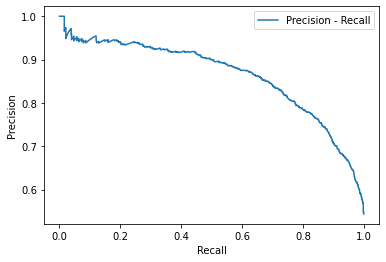

In [37]:
plt.plot(re, pr, label = 'Precision - Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend(loc = 0)
plt.show()

In [27]:
from sklearn.metrics import average_precision_score

In [28]:
# Посчитаем площадь под кривой Precision-Recall
average_precision_score( y_test, predictions[:, 1] )

0.864156596738954

#### Посчитаем AUC - площадь под кривой ROC, которая показывает взаимосвязь между False Positive Rate и True Positive Rate

In [29]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [30]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [31]:
# for line in zip(fpr, tpr, thres):
#     print(line)

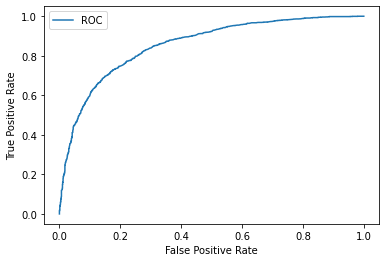

In [32]:
# Построим кривую
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = 'ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc = 0)
plt.show()

In [33]:
# Посчитаем площадь под ROC-кривой
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [34]:
roc_auc_score(y_test, predictions[:, 1])

0.8544595767496305

In [35]:
# Можно посчитать с помощью более общего метода AUC
from sklearn.metrics import auc
auc(fpr, tpr)

0.8544595767496305

#### Площадь под ROC-кривой AUC (Area Under Curve) является агрегированной характеристикой качества классификации, не зависящей от соотношения цен ошибок. Чем больше значение AUC, тем «лучше» модель классификации. Площадь кривой нашей модели приближается к единице (85%).